In [ ]:
import os
import pandas
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import sklearn

In [ ]:
filenames = []

for dirname, _, filenames in os.walk('./archive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
print(len(filenames))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
directory = './archive'

def retrive_data():
    #json_files = []
    #webm_files = []
    #ogg_files = []
    #csv_files = []
    
    file_list = os.listdir(directory)
    json_files = [file for file in file_list if ".json" in str(file)]
    webm_files = [file for file in file_list if ".webm" in str(file)]
    ogg_files = [file for file in file_list if ".ogg" in str(file)]
    wav_files = [file for file in file_list if ".wav" in str(file)]
    csv_files = [file for file in file_list if ".csv" in str(file)]
    
    return json_files, webm_files, ogg_files, wav_files, csv_files

json_files, webm_files, ogg_files, wav_files, csv_files = retrive_data()

print("Total file : ", len([name for name in os.listdir(directory)]))
print("Total file(json + webm + ogg + wav + csv) : ", len(json_files) + len(webm_files) + 
      len(ogg_files) + len(wav_files) + len(csv_files))
print("json : ", len(json_files))
print("webm + ogg : ", len(webm_files) + len(ogg_files))
print("webm : ", len(webm_files))
print("ogg : ", len(ogg_files))
print("wav : ", len(wav_files))
print("csv : ", len(csv_files))

Total file :  82651
Total file(json + webm + ogg + wav + csv) :  82651
json :  27550
webm + ogg :  27550
webm :  25985
ogg :  1565
wav :  27550
csv :  1


In [ ]:
import pandas as pd

In [ ]:
metadata_dir = 'D:/JupyterNotebook/COVID19_Cough_Classifier/archive/'
meta_file = 'metadata_compiled.csv'
metadata = pd.read_csv(metadata_dir + meta_file)

#uuid_list = metadata.uuid.to_numpy()
#status_list = metadata.status.to_numpy()

data_list = metadata.to_numpy()

status_list_set = []

for i in range(0, len(data_list)):
    status_list_set.append(data_list[i][10])
    
status_list = np.array(status_list_set)

find_idx = np.array(np.where(status_list == 'nan'))
#print(find_idx)
print(find_idx.shape)
print(find_idx.size)

wav_files_np = np.array(wav_files)
wav_files_np = np.delete(wav_files_np, find_idx)

print(wav_files_np.shape)

"""
#meta_list = metadata.to_numpy()

status_list_set = []

for i in range(0, len(meta_list)):
    status_list_set.append(meta_list[i][10])
"""

(1, 11326)
11326
(16224,)


'\n#meta_list = metadata.to_numpy()\n\nstatus_list_set = []\n\nfor i in range(0, len(meta_list)):\n    status_list_set.append(meta_list[i][10])\n'

In [ ]:
import sys
sys.path.append(os.path.abspath('./src'))
from feature_class import features
from DSP import classify_cough
from segmentation import segment_cough
from scipy.io import wavfile
import pickle

In [ ]:
model_load = pickle.load(open(os.path.join('./models', 'cough_classifier'), 'rb'))
scaler_load = pickle.load(open(os.path.join('./models', 'cough_classification_scaler'), 'rb'))                                           

In [ ]:
cough_detected_wav = []

np_size = wav_files_np.size

for cnt, wav_file in enumerate(wav_files_np):
    fs, x = wavfile.read(directory + '/' + wav_file)
    probability = classify_cough(x, fs, model_load, scaler_load)
    
    if probability > 0.8:
        cough_detected_wav.append(wav_file)
        print("{0}, {1}.......{2}/{3}".format(wav_file, round(probability*100, 5), cnt, np_size))

#for file in cough_detected_wav:
#    print("{0}, {1}".format(file, round(probability*100, 5)))

print("Total cough audio : ", len(cough_detected_wav))

In [ ]:
with open('cough_detected_wav.pkl', 'wb') as fp:
    pickle.dump(cough_detected_wav, fp)

In [ ]:
"""
sample_audio = cough_detected_wav[:1]
print(len(sample_audio))
print(sample_audio)
"""

1
['00039425-7f3a-42aa-ac13-834aaa2b6b92.wav']


In [ ]:
import matplotlib.pyplot as plt
from segmentation import segment_cough

In [ ]:
"""
wav_dir = './archive/'
audio_file = os.path.join(wav_dir, sample_audio[0])
print(audio_file)
"""

./archive/00039425-7f3a-42aa-ac13-834aaa2b6b92.wav


Text(0.5, 1.0, 'Audio Signal')

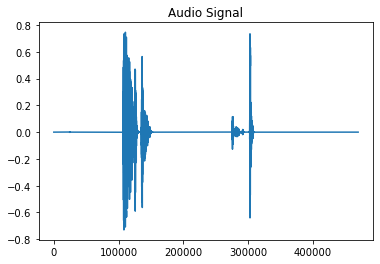

In [ ]:
"""
x, fs = librosa.load(audio_file, sr=None)
plt.plot(x)
plt.title("Audio Signal")
"""

Text(0.5, 1.0, 'Draw Segmentation')

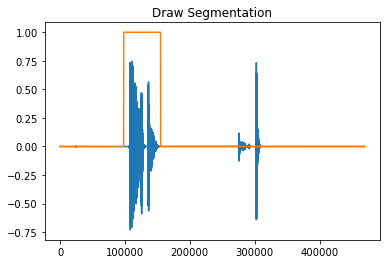

In [ ]:
"""
cough_segments, cough_mask = segment_cough(x, fs)
plt.plot(x)
plt.plot(cough_mask)
plt.title("Draw Segmentation")
"""

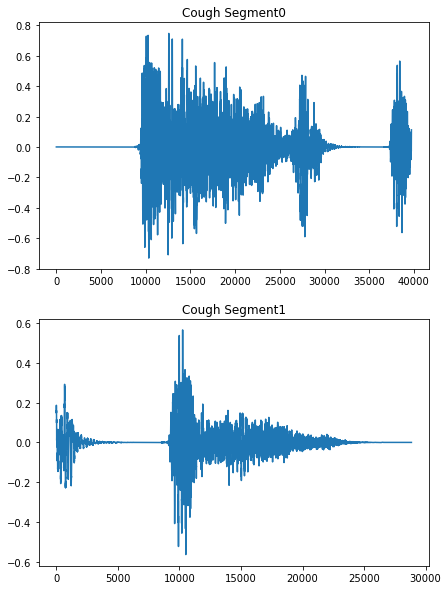

In [ ]:
"""
fig, axs = plt.subplots(len(cough_segments), 1, figsize=(7, 10))

for i in range(0, len(cough_segments)):
    axs[i].plot(cough_segments[i])
    axs[i].set_title("Cough Segment" + str(i))
"""

Text(0.5, 1.0, 'Draw Segmentation')

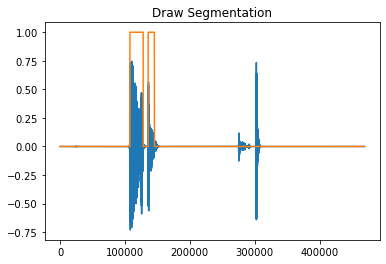

In [ ]:
"""
cough_segments, cough_mask = segment_cough(x, fs, cough_padding=0)
plt.plot(x)
plt.plot(cough_mask)
plt.title("Draw Segmentation")
"""

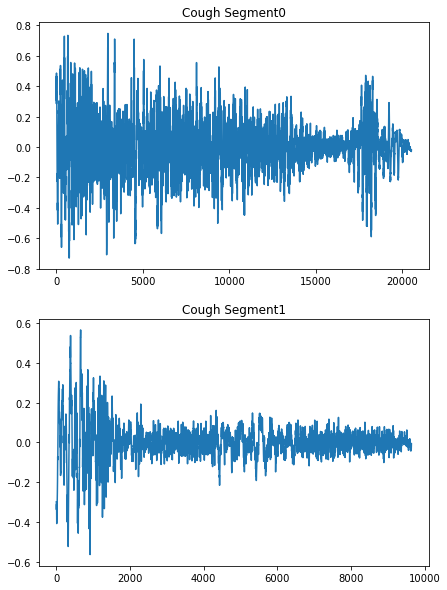

In [ ]:
"""
fig, axs = plt.subplots(len(cough_segments), 1, figsize=(7, 10))

for i in range(0, len(cough_segments)):
    axs[i].plot(cough_segments[i])
    axs[i].set_title("Cough Segment" + str(i))
"""

In [ ]:
#import numpy as np

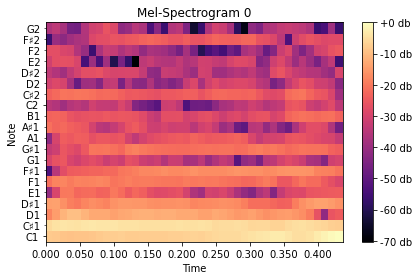

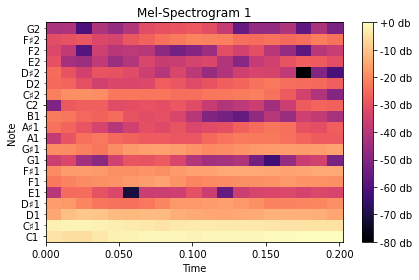

In [ ]:
"""
audio_mfcc = []

for i in range(0, len(cough_segments)):
    audio_mfcc.append(librosa.feature.mfcc(y=cough_segments[i], sr=fs))

for k in range(0, len(audio_mfcc)):
    amp_db = librosa.amplitude_to_db(np.abs(audio_mfcc[k]), ref=np.max)
    librosa.display.specshow(amp_db, sr=fs, x_axis='time', y_axis='cqt_note')
    plt.colorbar(format='%+2.0f db')
    plt.title('Mel-Spectrogram {}'.format(k))
    plt.tight_layout()
    plt.show()
"""

In [ ]:
"""
audio_mfcc_set = []

for i in range(0, len(cough_detected_wav)):
    x, fs = librosa.load(os.path.join('./archive/', cough_detected_wav[i]), sr=None)
    plt.plot(x)
    plt.title("Audio Signal {}".format(i + 1))
    plt.show()
    
    cough_segments, cough_mask = segment_cough(x, fs, cough_padding=0)
    plt.plot(x)
    plt.plot(cough_mask)
    plt.title("Draw Segmentation {}".format(i + 1))
    plt.show()
    
    if(len(cough_segments) == 1):
        fig, axs = plt.subplots(1, 1, figsize=(7, 10))
        axs.plot(cough_segments[0])
        axs.set_title("Cough Segment")
        plt.show()
    else:
        fig, axs = plt.subplots(len(cough_segments), 1, figsize=(7, 10))
        for k in range(0, len(cough_segments)):
            axs[k].plot(cough_segments[k])
            axs[k].set_title("Cough Segment" + str(k + 1))
        plt.show()
    
    audio_mfcc_set.append([])
    for n in range(0, len(cough_segments)):
        audio_mfcc_set[i].append(librosa.feature.mfcc(y=cough_segments[n], sr=fs, n_mfcc=30)) # default n_mfcc=20
    
    for m in range(0, len(audio_mfcc_set[i])):
        amp_db = librosa.amplitude_to_db(np.abs(audio_mfcc_set[i][m]), ref=np.max)
        librosa.display.specshow(amp_db, sr=fs, x_axis='time', y_axis='cqt_note')
        plt.colorbar(format='%+2.0f db')
        plt.title('Mel-Spectrogram {}'.format(m + 1))
        plt.tight_layout()
        plt.show()
"""

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

(100, 294)
(128, 411)


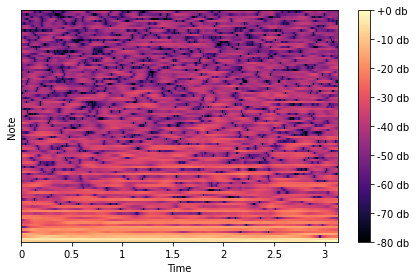

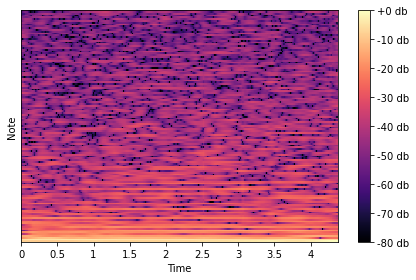

In [ ]:
x, fs = librosa.load(os.path.join('./archive/', cough_detected_wav[0]), sr=None)
cough_segments, cough_mask = segment_cough(x, fs, cough_padding=0)

#s = np.abs(librosa.stft(cough_segments[0]))
mfcc1 = np.array(librosa.feature.mfcc(y=cough_segments[0], sr=fs, n_mfcc=100, hop_length=70))
print(mfcc1.shape)

#s = np.abs(librosa.stft(cough_segments[0]))
mfcc2 = np.array(librosa.feature.mfcc(y=cough_segments[0], sr=fs, n_mfcc=128, hop_length=50))
#pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
#mfcc2 = pad2d(mfcc2, 100)
print(mfcc2.shape)

amp_db = librosa.amplitude_to_db(np.abs(mfcc1), ref=np.max)
librosa.display.specshow(amp_db, sr=fs, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f db')
plt.tight_layout()
plt.show()

amp_db = librosa.amplitude_to_db(np.abs(mfcc2), ref=np.max)
librosa.display.specshow(amp_db, sr=fs, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f db')
plt.tight_layout()
plt.show()

In [ ]:
import pickle

cough_dir = './cough_detected_wav.pkl'

cough_detected_wav = []

with open(cough_dir, 'rb') as fp:
    cough_detected_wav = pickle.load(fp)

In [ ]:
# 실제 모델 훈련 진행시 사용

audio_mfcc_set = []

for i in range(0, len(cough_detected_wav)):
    if (i % 100 == 0):
        print('Finished : {0}/{1}'.format(i, len(cough_detected_wav)))
        
    x, fs = librosa.load(os.path.join('./archive/', cough_detected_wav[i]), sr=None)
    cough_segments, cough_mask = segment_cough(x, fs, cough_padding=0)
    
    audio_mfcc_set.append([])
    
    for n in range(0, len(cough_segments)):
        audio_mfcc_set[i].append(librosa.feature.mfcc(y=cough_segments[n], sr=fs, n_mfcc=128, hop_length=50)) # default n_mfcc=20
        
print('success')

In [ ]:
with open('audio_mfcc_128_hop_50_set.pkl', 'wb') as fp:
    pickle.dump(audio_mfcc_set, fp)

In [ ]:
import os
import pickle

In [ ]:
mfcc_result = []

x, fs = librosa.load(os.path.join('./cough_sample/', 'sample1.wav'), sr=None)
mfcc_result.append(librosa.feature.mfcc(y=x, sr=fs, n_mfcc=128, hop_length=1024))

x, fs = librosa.load(os.path.join('./cough_sample/', 'sample2.wav'), sr=None)
mfcc_result.append(librosa.feature.mfcc(y=x, sr=fs, n_mfcc=128, hop_length=1024))

x, fs = librosa.load(os.path.join('./cough_sample/', 'sample2.wav'), sr=None)
mfcc_result.append(librosa.feature.mfcc(y=x, sr=fs, n_mfcc=128, hop_length=1024))
        
print('success')



success


In [ ]:
with open('real_data_set.pkl', 'wb') as fp:
    pickle.dump(mfcc_result, fp)

In [ ]:
#
# 테스트용
#
"""
temp_audio = []

for i in range(0, 10):
    if (i % 100 == 0):
        print('Finished : {0}/{1}'.format(i, 10))
        
    temp_x, temp_fs = librosa.load(os.path.join('./archive/', cough_detected_wav[i]), sr=None)
    temp_cough_segments, temp_cough_mask = segment_cough(temp_x, temp_fs, cough_padding=0)
    
    for n in range(0, len(cough_segments)):
        audio_mfcc_set.append(librosa.feature.mfcc(y=cough_segments[n], sr=fs, n_mfcc=30)) # default n_mfcc=20
        
print('success')
"""

In [ ]:
with open('audio_mfcc_set.pkl', 'wb') as fp:
    pickle.dump(audio_mfcc_set, fp)

In [ ]:
"""
print('Data Set Length : ' + str(len(audio_mfcc_set)))

amp_db = librosa.amplitude_to_db(np.abs(audio_mfcc_set[16242][0]), ref=np.max)
librosa.display.specshow(amp_db, sr=fs, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f db')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.show()

amp_db = librosa.amplitude_to_db(np.abs(audio_mfcc_set[10001][1]), ref=np.max)
librosa.display.specshow(amp_db, sr=fs, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f db')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.show()
"""

In [ ]:
import pickle
import pandas as pd

metadata_dir = './archive/'
meta_file = 'metadata_compiled.csv'
metadata = pd.read_csv(metadata_dir + meta_file)

cough_dir = './cough_detected_wav.pkl'

cough_detected_wav = []

with open(cough_dir, 'rb') as fp:
    cough_detected_wav = pickle.load(fp)

In [ ]:
"""
metadata_dir = 'D:/JupyterNotebook/COVID19_Cough_Classifier/archive/'
meta_file = 'metadata_compiled.csv'
metadata = pd.read_csv(metadata_dir + meta_file)

#uuid_list = metadata.uuid.to_numpy()
#status_list = metadata.status.to_numpy()
"""
meta_list = metadata.to_numpy()

status_list_set = []

for i in range(0, len(meta_list)):
    #print('{0}, {1}'.format(uuid_list[i], status_list[i]))
    #temp_wav = meta_list[i][0] + '.wav'
    if meta_list[i][0] + '.wav' in cough_detected_wav:
        status_list_set.append(meta_list[i][10])
        
for i in range(0, len(status_list_set)):
    print('{0}, {1}'.format(cough_detected_wav[i], status_list_set[i]))
    
print('meta_list : ' + str(len(meta_list)))
print('status : ' + str(len(status_list_set)))
print('cough_detected_wav : ' + str(len(cough_detected_wav)))

h = status_list_set.count('healthy')
s = status_list_set.count('symptomatic')
c = status_list_set.count('COVID-19')

print('healthy : {0}, symptomatic : {1}, COVID-19 : {2}'.format(h, s, c))

In [ ]:
with open('status_list_set.pkl', 'wb') as fp:
    pickle.dump(status_list_set, fp)

In [ ]:
"""
print("row : " + str(len(audio_mfcc)))
for i in range(0, len(audio_mfcc)):
    print('count : ' + str(i))
    print('column : ' + str(len(audio_mfcc[i])))
    for k in range(0, len(audio_mfcc[i])):
        amp_db = librosa.amplitude_to_db(np.abs(audio_mfcc[i][k]), ref=np.max)
        librosa.display.specshow(amp_db, sr=fs, x_axis='time', y_axis='cqt_note')
        plt.colorbar(format='%+2.0f db')
        plt.title('Mel-Spectrogram {}'.format(i + 1))
        plt.tight_layout()
        plt.show()
"""

for i in range(0, len(padded_mfcc)):
    amp_db = librosa.amplitude_to_db(np.abs(padded_mfcc[i]), ref=np.max)
    librosa.display.specshow(amp_db, sr=fs, x_axis='time', y_axis='cqt_note')
    plt.colorbar(format='%+2.0f db')
    plt.title('Mel-Spectrogram {}'.format(i + 1))
    plt.tight_layout()
    plt.show()   

In [ ]:
#2차원 mfcc 데이터가 저장된 리스트를 1차원 리스트로 변환
#status 레이블로 1차원 mfcc 리스트에 맞게끔 데이터 append 해줘야 됨

print(len(audio_mfcc_set))
print(len(audio_mfcc_set[0]))
print(len(audio_mfcc_set[0][0]))
print(len(audio_mfcc_set[0][0][1]))
#print(audio_mfcc_set[0])
#print(audio_mfcc_set[0][0])

audio_mfcc_dims = []
status_dims = np.array([])

for i in range(0, len(audio_mfcc_set)):
    for k in range(0, len(audio_mfcc_set[i])):
        audio_mfcc_dims.append(audio_mfcc_set[i][k])
        #audio_mfcc_temp = np.append(audio_mfcc_dims, audio_mfcc_set[i][k].reshape(-1))
        status_dims = np.append(status_dims, status_list_set[i])
    print('state : {0}/{1}'.format(i, len(audio_mfcc_set)))

print('audio 1 dimension : ' + str(len(audio_mfcc_dims)))
print('status 1 dimension : ' + str(len(status_dims)))


for i in range(0, len(status_dims)):
    if status_dims[i] == 'healthy':
        status_dims[i] = 0
    if status_dims[i] == 'symptomatic':
        status_dims[i] = 1
    if status_dims[i] == 'COVID-19':
        status_dims[i] = 2

In [ ]:
#audio_mfcc_dims_np = np.asarray(audio_mfcc_dims)

print(audio_mfcc_dims[0].shape)

(30, 41)


In [ ]:
#audio_mfcc_np = np.array(audio_mfcc_dims, dtype='float64')

#status_np = np.array(status_dims)

#print(audio_mfcc_np.shape, status_np.shape)

"""
find_idx = np.array(np.where(status_np == 'nan'))
print(find_idx)
print(find_idx.shape)
print(find_idx.size)

audio_mfcc_np = np.delete(audio_mfcc_np, find_idx, 0)
status_np = np.delete(status_np, find_idx)

print(audio_mfcc_np.shape, status_np.shape)
"""

In [ ]:
print(audio_mfcc_np[1][0].shape, status_np.shape)

(30, 34) (10554,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

for i in range(0, len(audio_mfcc_np)):
    for k in range(0, len(audio_mfcc_np[i])):
        scaler.fit(audio_mfcc_np[i][k])

In [ ]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten
from sklearn.model_selection import train_test_split

In [ ]:
audio_mfcc_array = np.expand_dims(audio_mfcc_np, -1)
audio_mfcc_array = np.expand_dims(audio_mfcc_array, -1)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(audio_mfcc_array, status_np, test_size=0.2)

#train_x = np.asarray(train_x).astype('float32')

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(8443, 1, 1)
(2111, 1, 1)
(8443,)
(2111,)


In [ ]:
pad2d = lambda a, i: a[:, 0:i] if a.shape[1] > i else np.hstack((a, np.zeros((a.shape[0], i-a.shape[1]))))
padded_mfcc = []
    
for i in range(0, len(audio_mfcc_dims)):
    padded_mfcc.append(pad2d(audio_mfcc_dims[i], 40))
    
    if (i % 100) == 0:
        print('state : {0}/{1}'.format(i, len(audio_mfcc_dims)))
        
print('success')

In [ ]:
audio_mfcc_np = np.array(padded_mfcc, dtype='float32')

print(audio_mfcc_np.shape, status_dims.shape)

(27129, 30, 40) (27129,)


In [ ]:
from tensorflow.keras.utils import to_categorical

audio_mfcc_array = np.expand_dims(audio_mfcc_np, -1)
status_cat = to_categorical(status_dims)

print(audio_mfcc_array.shape, status_cat.shape)

(27129, 30, 40, 1) (27129, 3)


In [ ]:
"""
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(audio_mfcc_np)
"""

#for i in range(0, len(audio_mfcc_np)):
 #   scaler.fit(audio_mfcc_np[i])
    #for k in range(0, len(audio_mfcc_dims[i])):
        #scaler.fit(audio_mfcc_dims[i][k])

'\nfrom sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler()\nscaler.fit(audio_mfcc_np)\n'

In [ ]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(audio_mfcc_array, status_cat, test_size=0.2)

#train_x = np.asarray(train_x).astype('float32')

In [ ]:
#print(len(train_x))
#print(len(test_x))
#print(len(train_y))
#print(len(test_y))

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

print(train_x[1000].shape)

"""
train_x = np.asarray(train_x)
test_x = np.asarray(test_x)
train_y = np.asarray(train_y)
test_y = np.asarray(test_y)
"""

(21703, 30, 40, 1)
(5426, 30, 40, 1)
(21703, 3)
(5426, 3)
(30, 40, 1)


'\ntrain_x = np.asarray(train_x)\ntest_x = np.asarray(test_x)\ntrain_y = np.asarray(train_y)\ntest_y = np.asarray(test_y)\n'

In [ ]:
print(test_y[0])
print(test_y[1])
print(test_y[2])

print(test_y.shape)

[0. 1. 0.]
[1. 0. 0.]
[1. 0. 0.]
(5426, 3)


In [ ]:
def build_model():
    model = Sequential()
    
    input = Input(shape=(30, 40, 1))
    
    output = Conv2D(128, (3, 3), strides=1, padding='same', activation='relu')(input)
    output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)
    
    output = Conv2D(256, (3, 3), strides=1, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)
    
    output = Conv2D(512, (3, 3), strides=1, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)
    
    output = Flatten()(output)
    
    output = Dense(512, activation='relu')(output)
    output = Dense(256, activation='relu')(output)
    output = Dense(128, activation='relu')(output)
    output = Dense(3, activation='softmax')(output)
    
    model = Model(inputs=[input], outputs=output)
    
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
    
    return model
    

In [ ]:
model = build_model()
model.summary()

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        [(None, 30, 40, 1)]       0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 30, 40, 128)       1280      
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 15, 20, 128)       0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 15, 20, 256)       295168    
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 8, 10, 256)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 8, 10, 512)        1180160   
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 4, 5, 512)         0  

In [ ]:
history = model.fit(train_x, train_y, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
136/136 [==============================] - 377s 3s/step - loss: 0.9316 - acc: 0.7618 - val_loss: 0.6565 - val_acc: 0.7752
Epoch 2/20
136/136 [==============================] - 366s 3s/step - loss: 0.6671 - acc: 0.7701 - val_loss: 0.6662 - val_acc: 0.7752
Epoch 3/20
136/136 [==============================] - 419s 3s/step - loss: 0.6628 - acc: 0.7701 - val_loss: 0.6460 - val_acc: 0.7752
Epoch 4/20
136/136 [==============================] - 386s 3s/step - loss: 0.6562 - acc: 0.7701 - val_loss: 0.6445 - val_acc: 0.7752
Epoch 5/20
136/136 [==============================] - 365s 3s/step - loss: 0.6515 - acc: 0.7701 - val_loss: 0.6601 - val_acc: 0.7749
Epoch 6/20
136/136 [==============================] - 362s 3s/step - loss: 0.6472 - acc: 0.7701 - val_loss: 0.7345 - val_acc: 0.7395
Epoch 7/20
136/136 [==============================] - 349s 3s/step - loss: 0.6454 - acc: 0.7699 - val_loss: 0.6645 - val_acc: 0.7745
Epoch 8/20
136/136 [==============================] - 349s 3s/step - 

In [ ]:
def plot_history(history_dict):
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    
    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(14, 15))
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b--', label='train_loss')
    ax1.plot(epochs, val_loss, 'r:', label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('loss')
    ax1.grid()
    ax1.legend()
    
    acc = history_dict['acc']
    val_acc = history_dict['val_acc']
    
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, acc, 'b--', label='train_accuracy')
    ax2.plot(epochs, val_acc, 'r:', label='val_accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('acc')
    ax2.grid()
    ax2.legend()
    
    plt.show()

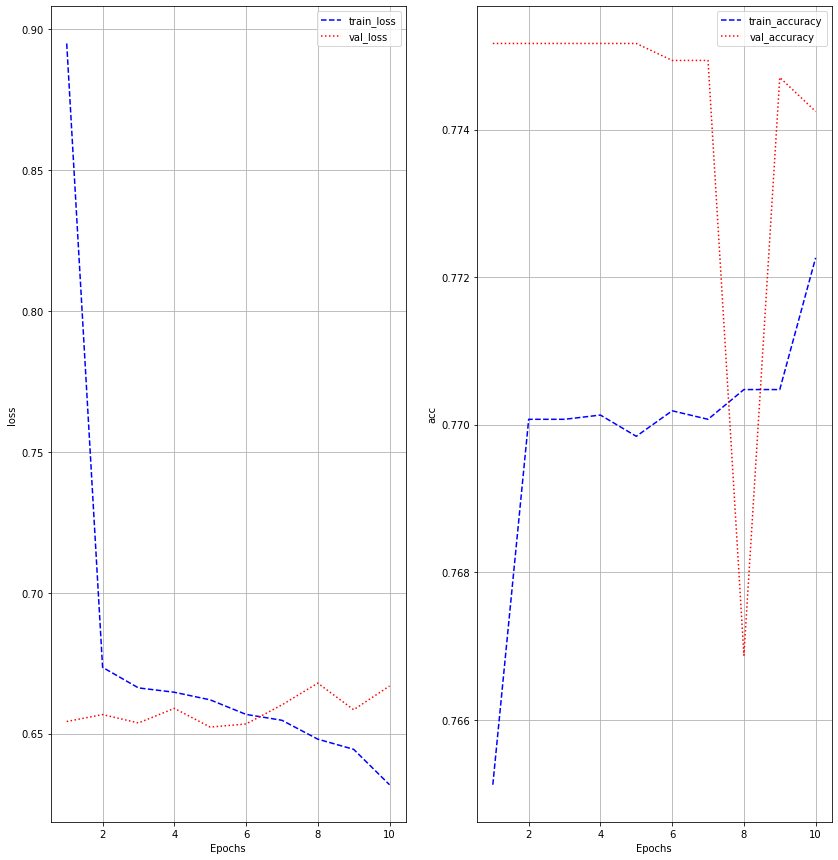

In [ ]:
plot_history(history.history)

In [ ]:
data_x = test_x[0:10]
data_y = model.predict(data_x)

#print('Data : ' + str(test_y[test_idx]))
print('Predict : ' + str(data_y))

Predict : [[0.8033535  0.17609084 0.0205558 ]
 [0.77377546 0.17183362 0.05439097]
 [0.69154054 0.17047843 0.13798098]
 [0.75766927 0.18409595 0.0582348 ]
 [0.6858102  0.27427438 0.03991549]
 [0.6352851  0.2719542  0.09276072]
 [0.78245795 0.17610413 0.04143801]
 [0.7001978  0.18038951 0.11941268]
 [0.8465111  0.15047929 0.00300959]
 [0.6406453  0.29546577 0.06388886]]


In [ ]:
print(test_x[0])

[[[-180.35078   ]
  [-158.19728   ]
  [-136.65211   ]
  ...
  [   0.        ]
  [   0.        ]
  [   0.        ]]

 [[ 203.83191   ]
  [ 222.1884    ]
  [ 230.27051   ]
  ...
  [   0.        ]
  [   0.        ]
  [   0.        ]]

 [[ -69.56137   ]
  [ -83.614914  ]
  [ -98.78371   ]
  ...
  [   0.        ]
  [   0.        ]
  [   0.        ]]

 ...

 [[   2.6482973 ]
  [   0.72670925]
  [  -8.616787  ]
  ...
  [   0.        ]
  [   0.        ]
  [   0.        ]]

 [[   3.2623918 ]
  [   6.971326  ]
  [   5.811128  ]
  ...
  [   0.        ]
  [   0.        ]
  [   0.        ]]

 [[  -4.061895  ]
  [  -0.9948555 ]
  [  -4.511733  ]
  ...
  [   0.        ]
  [   0.        ]
  [   0.        ]]]
